In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
lst_fire_img = glob.glob('/kaggle/input/fire-dataset/fire_dataset/fire_images/*.png')
lst_non_fire_img = glob.glob('/kaggle/input/fire-dataset/fire_dataset/non_fire_images/*.png')

In [ ]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))
print('Number of images with fire : {}'.format(len(lst_non_fire_img)))

Number of images with fire : 755
Number of images with fire : 244


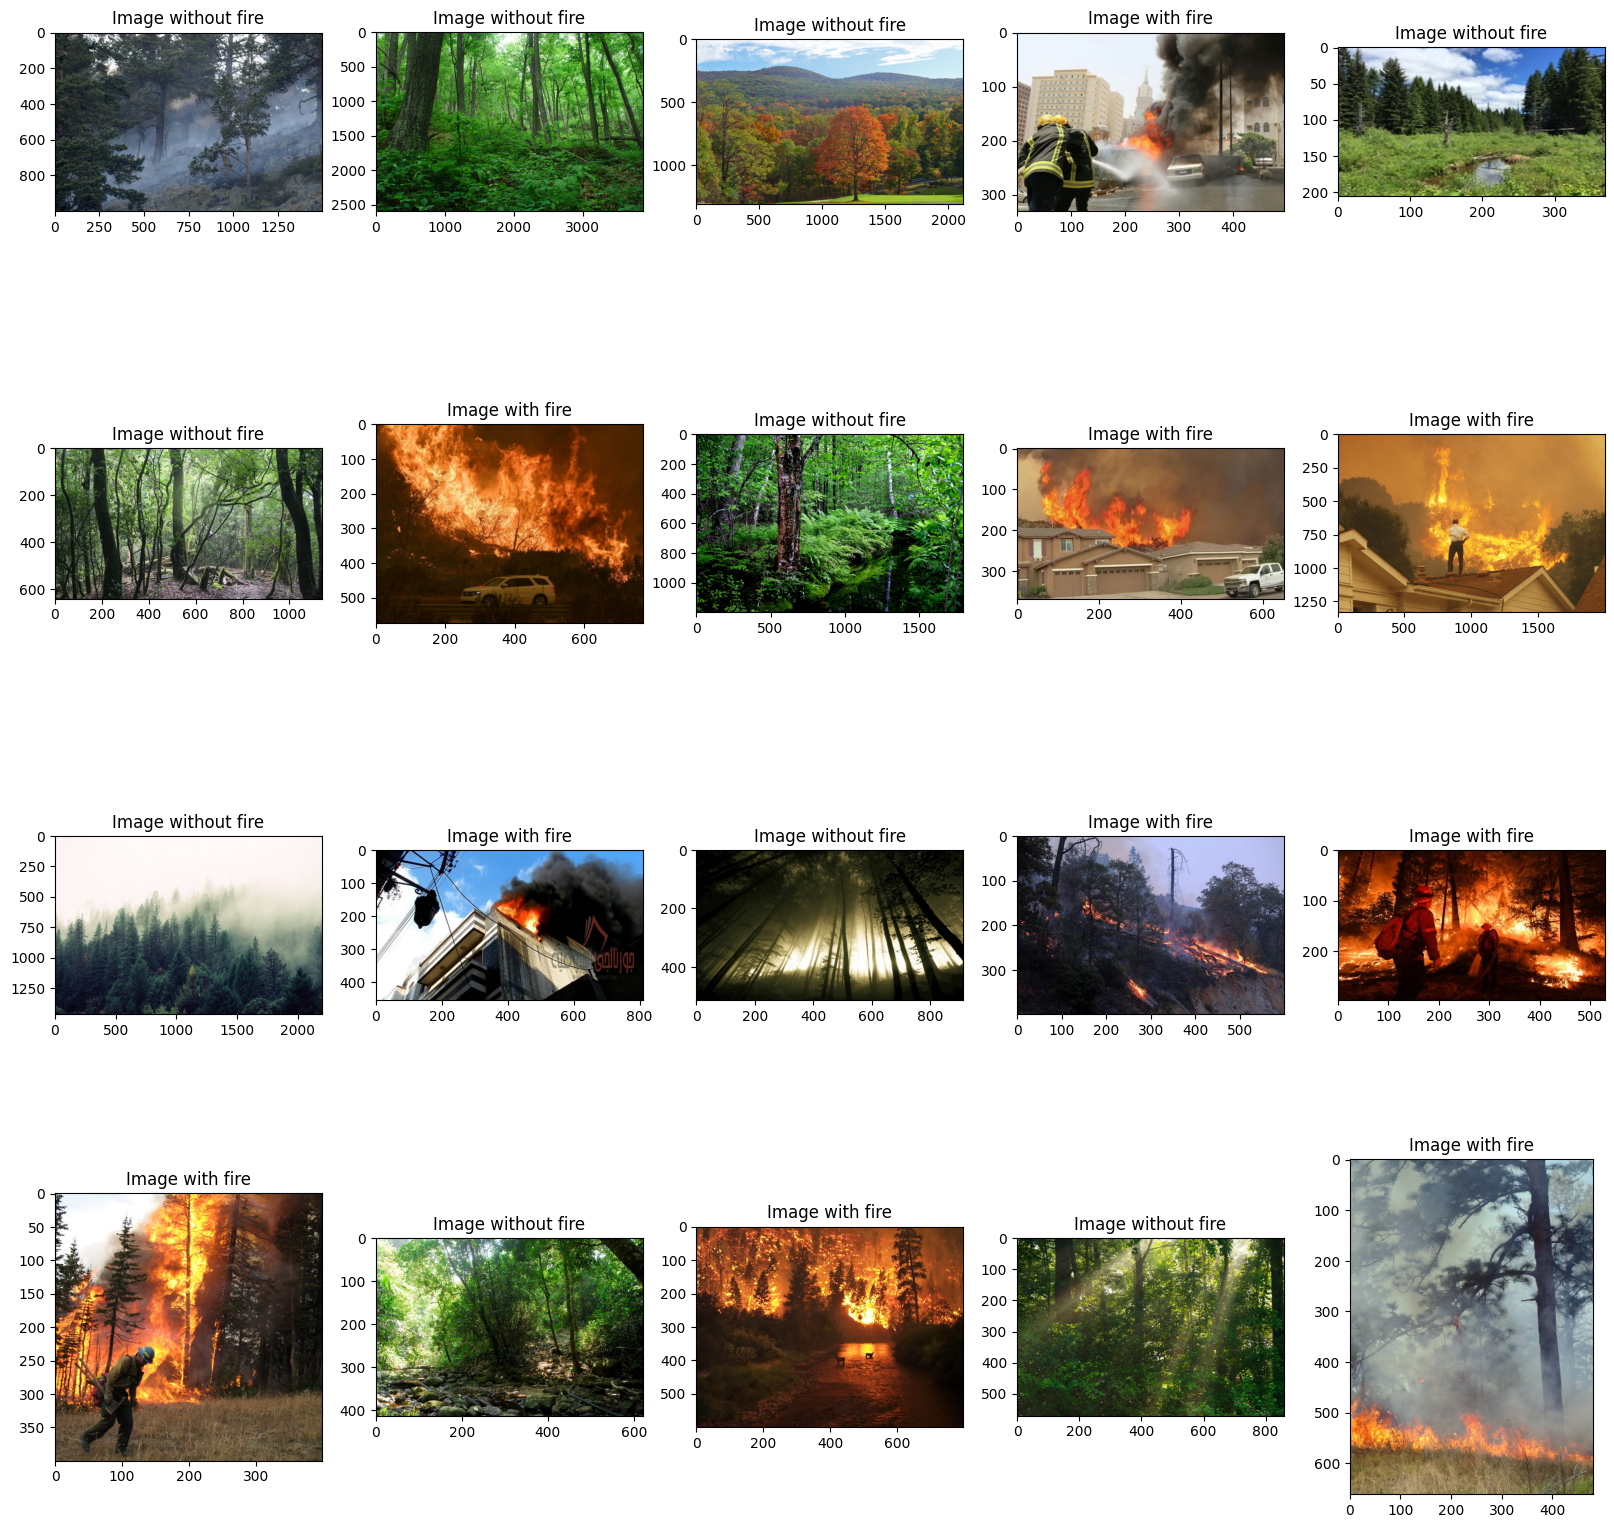

In [ ]:
lst_images_random = random.sample(lst_fire_img,10) + random.sample(lst_non_fire_img,10)
random.shuffle(lst_images_random)

plt.figure(figsize = (20,20))

for i in range(len(lst_images_random)):
    
    plt.subplot(4,5,i+1)


    if "non_fire" in lst_images_random[i]:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title('Image without fire')

    else:
        img = cv2.imread(lst_images_random[i])
        img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        plt.imshow(img,cmap = 'gray')
        plt.title("Image with fire")



plt.show()

In [ ]:
lst_fire = []
for x in lst_fire_img:
  lst_fire.append([x,1])
lst_nn_fire = []
for x in lst_non_fire_img:
  lst_nn_fire.append([x,0])
lst_complete = lst_fire + lst_nn_fire
random.shuffle(lst_complete)

In [ ]:
df = pd.DataFrame(lst_complete,columns = ['files','target'])
df.head(10)

,files,target
0,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1
1,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1
2,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1
3,/kaggle/input/fire-dataset/fire_dataset/non_fi...,0
4,/kaggle/input/fire-dataset/fire_dataset/non_fi...,0
5,/kaggle/input/fire-dataset/fire_dataset/non_fi...,0
6,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1
7,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1
8,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1
9,/kaggle/input/fire-dataset/fire_dataset/fire_i...,1


In [ ]:
filepath_img = '/kaggle/input/fire-dataset/fire_dataset/non_fire_images/non_fire.189.png'
df = df.loc[~(df.loc[:,'files'] == filepath_img),:]
df.shape

(998, 2)

In [ ]:
def preprocessing_image(filepath):
  img = cv2.imread(filepath) #read
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
  img = cv2.resize(img,(196,196))  # resize
  img = img / 255 #scale
  return img 

In [ ]:
def create_format_dataset(dataframe):
  X = []
  y = []
  for f,t in dataframe.values:
    X.append(preprocessing_image(f))
    y.append(t)
  
  return np.array(X),np.array(y)

In [ ]:
X, y = create_format_dataset(df)

In [ ]:
X.shape,y.shape

((998, 196, 196, 3), (998,))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((798, 196, 196, 3), (200, 196, 196, 3), (798,), (200,))

In [ ]:
model = Sequential()

model.add(Conv2D(128,(2,2),input_shape = (196,196,3),activation='relu'))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32,(2,2),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1,activation= "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 195, 195, 128)     1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 194, 194, 64)      32832     
                                                                 
 max_pooling2d (MaxPooling2  (None, 97, 97, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 73728)             0

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss',patience = 10,restore_best_weights=True)]
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 30,batch_size = 32,callbacks = callbacks)

Epoch 1/30
25/25 [==============================] - 109s 4s/step - loss: 0.7050 - accuracy: 0.8145 - val_loss: 0.1737 - val_accuracy: 0.9350
Epoch 2/30
25/25 [==============================] - 106s 4s/step - loss: 0.1590 - accuracy: 0.9398 - val_loss: 0.1246 - val_accuracy: 0.9400
Epoch 3/30
25/25 [==============================] - 107s 4s/step - loss: 0.1193 - accuracy: 0.9511 - val_loss: 0.1444 - val_accuracy: 0.9500
Epoch 4/30
25/25 [==============================] - 106s 4s/step - loss: 0.0919 - accuracy: 0.9649 - val_loss: 0.1199 - val_accuracy: 0.9600
Epoch 5/30
25/25 [==============================] - 107s 4s/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.1094 - val_accuracy: 0.9600
Epoch 6/30
25/25 [==============================] - 107s 4s/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.1776 - val_accuracy: 0.9550
Epoch 7/30
25/25 [==============================] - 106s 4s/step - loss: 0.0517 - accuracy: 0.9825 - val_loss: 0.1161 - val_accuracy: 0.9550
Epoch 8/30
25

In [ ]:
y_pred = model.predict(X_test)

7/7 [==============================] - 7s 943ms/step


In [ ]:
y_pred = y_pred.reshape(-1)
y_pred[y_pred<0.5] = 0
y_pred[y_pred>=0.5] = 1
y_pred = y_pred.astype('int')

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1])

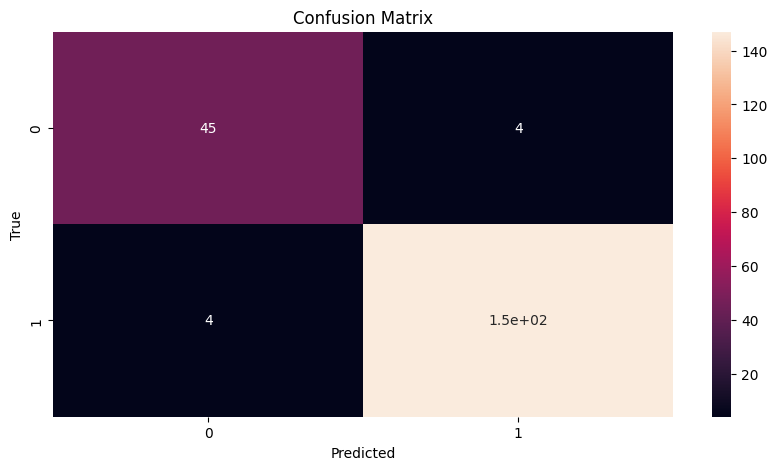

In [ ]:
plt.figure(figsize = (10,5))

sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        49
           1       0.97      0.97      0.97       151

    accuracy                           0.96       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.96      0.96      0.96       200

